# Price Simulator Analysis


## Introduction

This notebook explores the simulation of energy market prices using the `PriceSimulator` class. By generating smooth price envelopes for peak and off-peak hours and adding random noise and spikes, we aim to replicate realistic market conditions. The analysis will include visualizing these simulated prices to understand the potential impact of market fluctuations on energy trading and storage strategies.


## Setup

In this section, we set up our environment by importing necessary Python libraries and configuring plot aesthetics for better visualization.


In [1]:
# Importing necessary libraries
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
sns.set(style="whitegrid")

module_path = os.path.abspath(os.path.join('../'))

if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.prices import PriceSimulator

## Smooth Price Envelope Generation

First, we generate a smooth price envelope to model typical daily price fluctuations, with higher prices during peak hours and lower prices during off-peak hours.


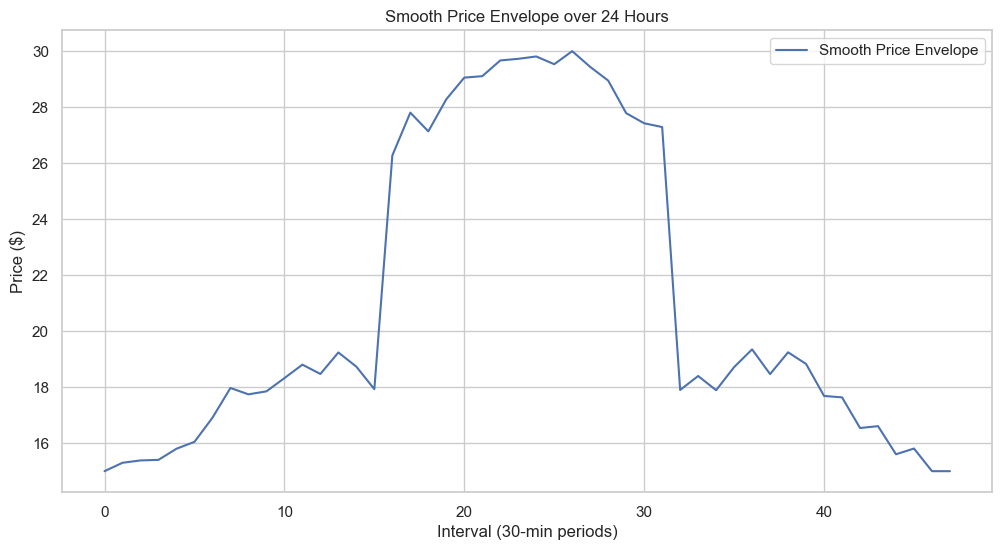

In [2]:
# Assuming PriceSimulator class is already defined with price_envelope method
smooth_prices = PriceSimulator.price_envelope(num_intervals=48, min_price=15, max_price=30, peak_start=16, peak_end=32,date=date(2023, 1, 31))

# Convert to pandas DataFrame for easy plotting
df_smooth_prices = pd.DataFrame({'Interval': range(48), 'Price': smooth_prices})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_smooth_prices['Interval'], df_smooth_prices['Price'], label='Smooth Price Envelope')
plt.xlabel('Interval (30-min periods)')
plt.ylabel('Price ($)')
plt.title('Smooth Price Envelope over 24 Hours')
plt.legend()
plt.show()

## Adding Noise and Spikes

Next, we overlay the smooth price envelope with random noise and occasional spikes to simulate unexpected market behaviors and volatility.


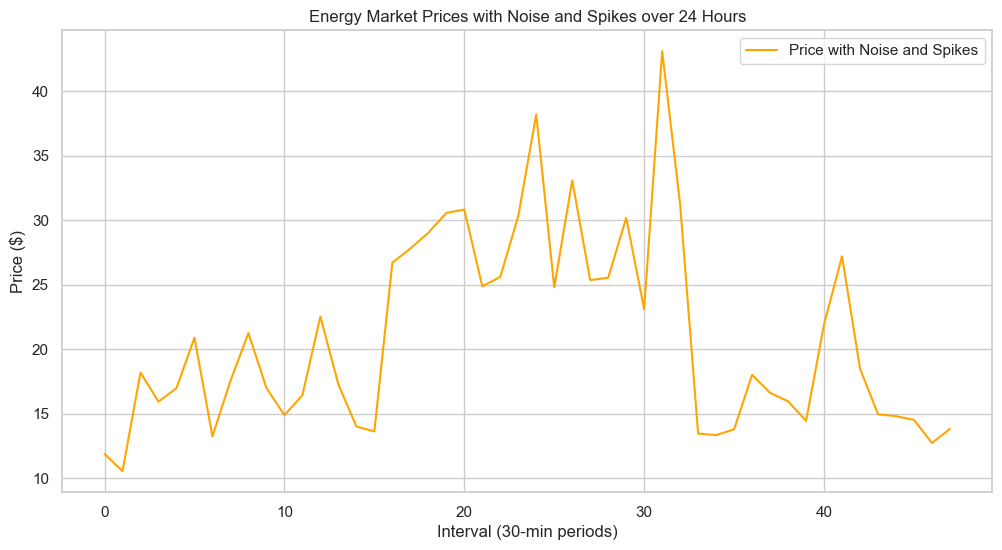

In [3]:
noisy_spiky_prices = PriceSimulator.add_noise_and_spikes(smooth_prices)

# Convert to pandas DataFrame for easy plotting
df_noisy_spiky_prices = pd.DataFrame({'Interval': range(48), 'Price': noisy_spiky_prices})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_noisy_spiky_prices['Interval'], df_noisy_spiky_prices['Price'], label='Price with Noise and Spikes', color='orange')
plt.xlabel('Interval (30-min periods)')
plt.ylabel('Price ($)')
plt.title('Energy Market Prices with Noise and Spikes over 24 Hours')
plt.legend()
plt.show()